<a href="https://colab.research.google.com/github/tahani319/DS_Capstone_RFM_Analysis/blob/main/RFM_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Data Set Information:**

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01.12.2010 and 09.12.2011.

The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. 
https://archive.ics.uci.edu/ml/datasets/online+retail


**Attribute Information:**

* InvoiceNo: Invoice number. Nominal. A 6-digit integral
* number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.





**Import libraries**

In [214]:
#import libraries

import pandas as pd # for dataframes
import numpy as np
import seaborn as sns #for gaphs 
import matplotlib.pyplot as plt # for plotting graphs
import datetime as dt 
import missingno as msno # to visualise missing values 

**Data:**

In [176]:
transactions = pd.read_excel('onlineretail.xlsx') #read data 

#### **Explore Data:**

**Data head:**

In [177]:
transactions.head() #see the first rows of data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data tail:**

In [178]:
transactions.tail() #see the last row of data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


**checke the data-types of the data:**

In [179]:
transactions.dtypes #to see data-types 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

**data information:**

In [180]:
transactions.info() #to see data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Missing valuse:** we want to check missing values in our datast 

In [181]:
print('Number of Missing Values:' ,  transactions.isnull().sum()) ##check null values 

Number of Missing Values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


we see that we have 135080 missing values in Customer ID column and 1454 missing values in Descriptions column. 

**Visualize missing values:**
to see the missing values 

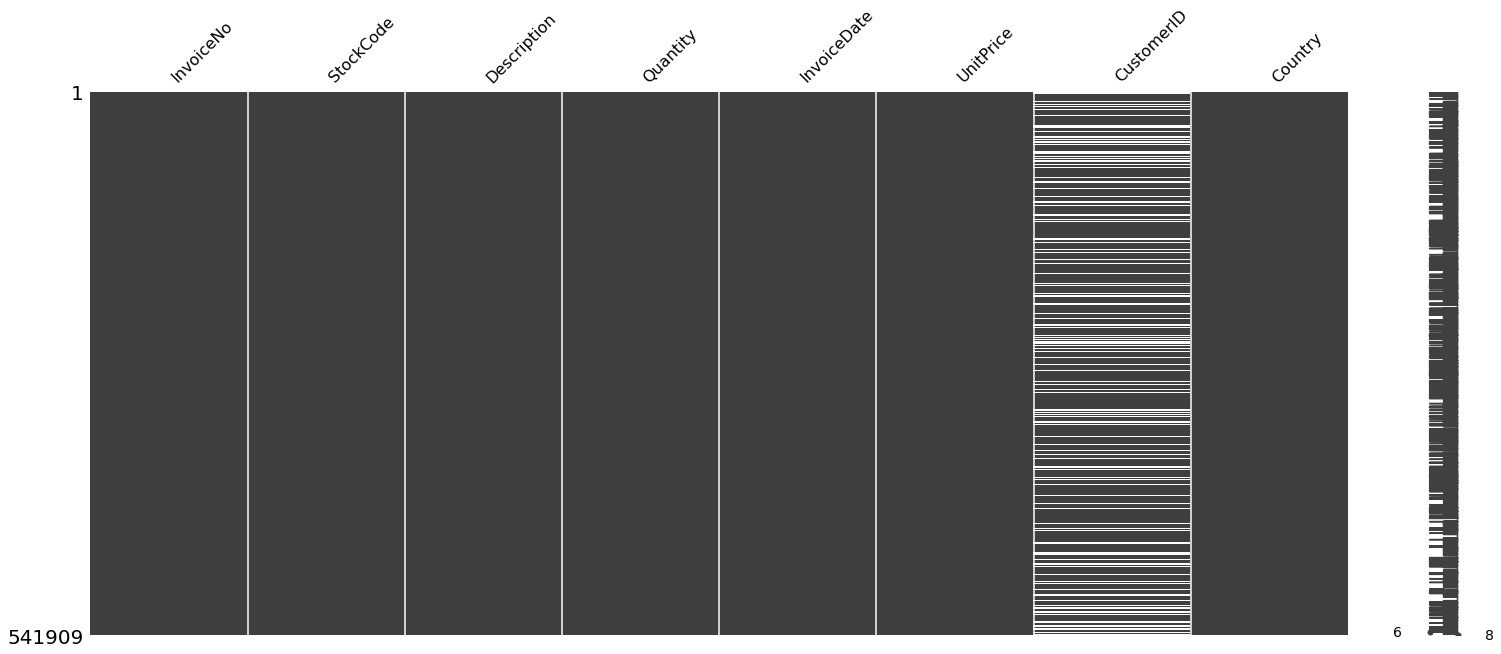

In [182]:
#plot missing values 
msno.matrix(transactions)
plt.show()

see some basic statistics about our data: 

In [183]:
transactions.describe() ##see some basic statistics about our data 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


what we see in the summary of our data that Quantity and UnitPrice columns  have some odd and irregular values,
as we know we have transactions contains returned products, 

we see thoes transaction in any 'InvoiceNo' codes start with a 'c' letter, so because of that 'UnitPrice'  and 'Quantity" have  negative values. 
so we will remove all of these negative values.

**Canceled transactions:**

we want to see how much canceled transactions do we have, 
we select InvoiceNo,  since any code starts with the letter 'c', it indicates a cancellation: 

In [184]:
canceled = transactions[transactions["InvoiceNo"].str.contains("C",na=False)]
canceled.sort_values("Quantity", ascending = True).head() #to see how much canceled transactions do we have

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom


see how much canceled transactions do we have: 

In [185]:
canceled.info() #to see how canceled transactions do we have 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 141 to 541717
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    9288 non-null   object        
 1   StockCode    9288 non-null   object        
 2   Description  9288 non-null   object        
 3   Quantity     9288 non-null   int64         
 4   InvoiceDate  9288 non-null   datetime64[ns]
 5   UnitPrice    9288 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      9288 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 653.1+ KB



here we want to discover  which products were mostly returned by customers:

In [186]:
Returnedproducts = transactions[transactions.Quantity<0].groupby('Description')['Quantity'].sum()
Returnedproducts = Returnedproducts.abs().sort_values(ascending=False)[0:10]

Text(0.5, 1.0, 'Most Returned Items')

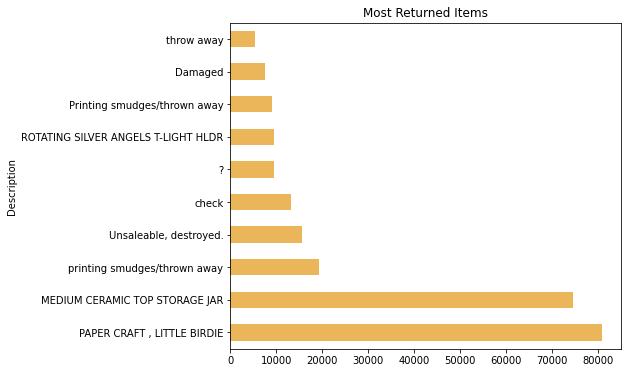

In [187]:
plt.figure(figsize=(7,6))
Returnedproducts.plot(kind='barh', color='#ebb55a')
plt.title('Most Returned Items')

 we see here we notice that we have odd descriptions,  they are comments from customrs not the names of products. 

here we want to see customers who have the most returned items in their transactions and where they are from: 


In [188]:
ReturnCust = transactions[transactions.Quantity<0].groupby(['CustomerID','Country'])['Quantity'].sum()
ReturnCust = ReturnCust.abs().sort_values(ascending=False)[0:10]

Text(0.5, 1.0, 'Customers with most Returns')

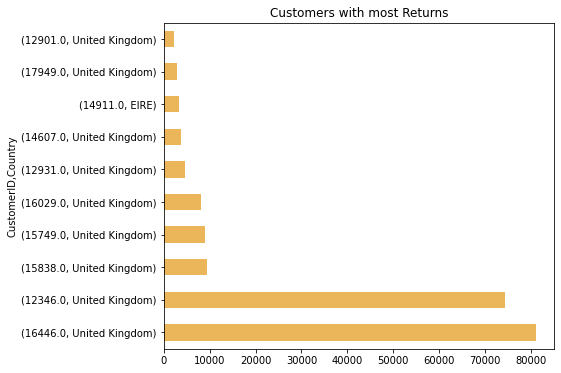

In [189]:
plt.figure(figsize=(7,6))
ReturnCust.plot(kind='barh', color='#ebb55a')
plt.title('Customers with most Returns')

**Check duplicated values:** 

here we want to check how much duplicated values do we have

In [190]:
print('Number of duplicated records: ', transactions.duplicated(keep='first').sum()) #check duplicated values

Number of duplicated records:  5268


we have 5268 duplicated values. 

#### **Data Wrangling:**

we will drop missing values:

In [191]:
#drop missing values
transactions.dropna (axis=0, inplace= True) 

and remove duplicated values:

In [192]:
transactions.drop_duplicates(keep=False,inplace=True)  #drop duplicated values 

Remove negative values and 0 quantities from dataset:

In [193]:
# Remove negative and 0 quantities and prices
transactions= transactions[transactions['Quantity']>0]
transactions= transactions[transactions['UnitPrice']>0]

see summary of data now:

In [194]:
transactions.describe()

,Quantity,UnitPrice,CustomerID
count,387883.000000,387883.000000,387883.000000
mean,13.244192,3.134954,15281.730762
std,181.587861,22.377731,1713.926205
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13941.000000
50%,6.000000,1.950000,15144.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,8142.750000,18287.000000


now it is much better.

here we want to see number of countries do we have:

In [195]:
countries= transactions.Country.value_counts() #count of countries 
print(countries)

United Kingdom          344466
Germany                   9010
France                    8311
EIRE                      7216
Spain                     2474
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1445
Australia                 1180
Norway                    1071
Italy                      758
Channel Islands            746
Finland                    685
Cyprus                     593
Sweden                     449
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     242
Unspecified                238
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

here we want to see the top 5 countries of heghiest numbers of transactions :

In [196]:
 #see the top 5 countries of heghiest numbers of transactions


countries= transactions.Country.value_counts()
countries.head(5)


United Kingdom    344466
Germany             9010
France              8311
EIRE                7216
Spain               2474
Name: Country, dtype: int64

 UK has maximum number of transactions followed by Germany.

**Visualize the result:**

Text(0.5, 1.0, 'Top Countries')

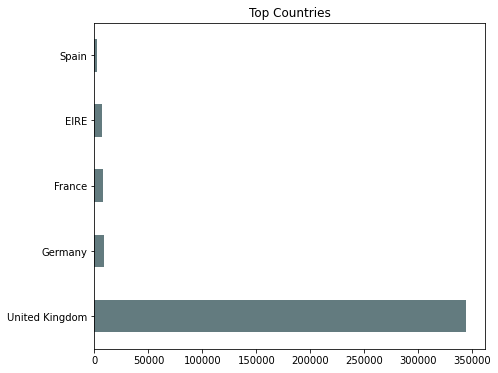

In [197]:
plt.figure(figsize=(7,6)) #plot the top countries of the most records 
countries.head(5).plot(kind='barh', color='#637b7f')
plt.title('Top Countries')

## **RFM Model:**

RMF is a simple method for categorising customers based on their purchasing behaviour. The behaviour is identified by using only three customer data points:
*  the recency of purchase (R)
*  the frequency of purchases (F)
*  the mean monetary value of each purchase (M)

 After some calculations on the RFM data we can create customer segments that are actionable and easy to understand




so for the RFM model I choose Germany 
so i will make new data set only have transactions from Germany.

In [198]:
germany_transactions = transactions[transactions['Country']=='Germany'] #choose Germany  

here I want to see the most sold prducts by customers from Germany 

In [199]:
#explore and visualize the most sold products in Germany
most_sold = germany_transactions['Description'].value_counts().head(15)
print('Most Sold Products')
print(most_sold)

Most Sold Products
POSTAGE                                374
ROUND SNACK BOXES SET OF4 WOODLAND     111
ROUND SNACK BOXES SET OF 4 FRUITS       72
REGENCY CAKESTAND 3 TIER                63
PLASTERS IN TIN WOODLAND ANIMALS        62
WOODLAND CHARLOTTE BAG                  58
PLASTERS IN TIN CIRCUS PARADE           53
PLASTERS IN TIN SPACEBOY                49
6 RIBBONS RUSTIC CHARM                  47
SPACEBOY LUNCH BOX                      47
JUMBO BAG WOODLAND ANIMALS              46
RED TOADSTOOL LED NIGHT LIGHT           44
JAM MAKING SET PRINTED                  42
PACK OF 72 RETROSPOT CAKE CASES         39
JUMBO BAG RED RETROSPOT                 36
Name: Description, dtype: int64


Text(0.5, 1.0, 'Most Sold Products by Germany Customers')

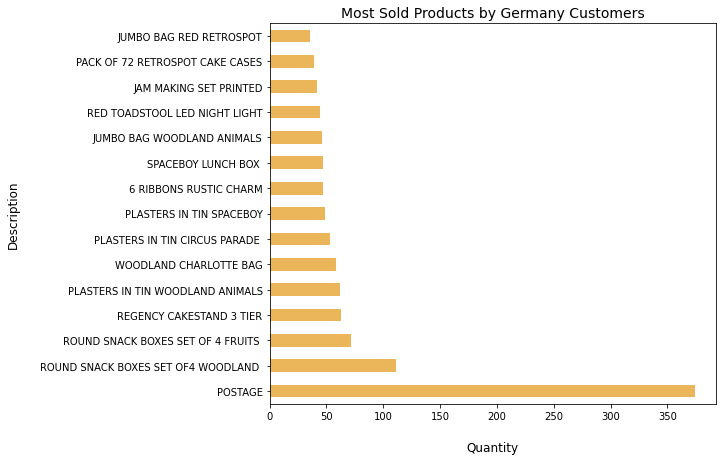

In [200]:
plt = most_sold.plot(kind='barh',color='#ebb55a', figsize=(8, 7))
 # Set x-axis label
plt.set_xlabel("Quantity", labelpad=20, size=12)

  # Set y-axis label
plt.set_ylabel("Description", labelpad=20, size=12)


plt.set_title('Most Sold Products by Germany Customers', fontsize= 14)

**RFM Model:**

 Filter the necessary columns for RFM analysis :

 CustomerID, InvoiceDate, InvoiceNo, Quantity and UnitPrice

In [201]:
#Filter the necessary columns for RFM analysis
germany_transactions= germany_transactions[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

Created a sum column to calculated the revenue for each order line by multiplying the Quantity with the UnitPrice, then we groupe the transactions on InvoiceNo and created Amount column to hold the revenue for each invoice.

In [202]:
#Created a sum column to calculated the revenue for each order line by multiplying the Quantity with the UnitPrice 
germany_transactions['Amount'] = germany_transactions['Quantity'] * germany_transactions['UnitPrice']

RFM Analysis

 we are going do 

* For Recency, Calculate the number of days between present date and date of last purchase each customer.

* For Frequency, Calculate the number of orders for each customer.

* For Monetary, Calculate sum of purchase price for each customer.

In [203]:
#check the first day purchase and last day purchase
germany_transactions['InvoiceDate'].min(),germany_transactions['InvoiceDate'].max()

(Timestamp('2010-12-01 13:04:00'), Timestamp('2011-12-09 12:16:00'))

In [204]:

PRESENT = dt.datetime(2011,12,10)
germany_transactions['InvoiceDate'] = pd.to_datetime(germany_transactions['InvoiceDate'])

In [205]:
rfm= germany_transactions.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Amount': lambda price: price.sum()})

see the name of columns: 

In [206]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'Amount'], dtype='object')

In [207]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']

In [208]:
germany_transactions.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Amount
1109,12662.0,2010-12-01 13:04:00,536527,6,2.95,17.7
1110,12662.0,2010-12-01 13:04:00,536527,6,2.55,15.3
1111,12662.0,2010-12-01 13:04:00,536527,12,0.85,10.2
1112,12662.0,2010-12-01 13:04:00,536527,12,1.65,19.8
1113,12662.0,2010-12-01 13:04:00,536527,12,1.95,23.4


In [209]:
rfm['recency'] = rfm['recency'].astype(int)

In [210]:
# Filter out non repeat customers
rfm = rfm[rfm['frequency']>0]

In [211]:
# Filter out monetary outliers
rfm = rfm[rfm['monetary']<2000]

In [212]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12426.0,194,30,582.73
12427.0,21,31,825.80
12468.0,187,38,729.54
12475.0,53,36,723.38
12479.0,11,31,527.20


 we wnant see how our data are distributed :

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

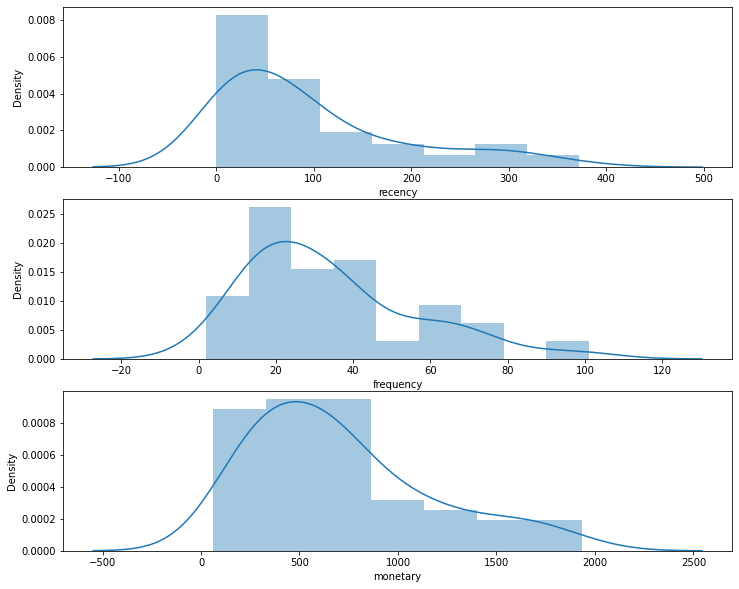

In [215]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm['monetary'])
# Show the plot
plt.show()

Create the quartiles scores

In [216]:
# Create the quartiles scores
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12426.0,194,30,582.73
12427.0,21,31,825.80
12468.0,187,38,729.54
12475.0,53,36,723.38
12479.0,11,31,527.20


In [217]:
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def RFMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm['R'] = rfm['recency'].apply(RFMScore, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(RFMScore, args=('frequency',quantiles,))
rfm['M'] = rfm['monetary'].apply(RFMScore, args=('monetary',quantiles,))

In [218]:
rfm.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12426.0,194,30,582.73,4,2,2
12427.0,21,31,825.80,1,3,3
12468.0,187,38,729.54,4,3,3
12475.0,53,36,723.38,2,3,3
12479.0,11,31,527.20,1,3,2


create segment: 

In [220]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(join_rfm, axis=1)

calculate RFM Score:

In [221]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

In [222]:
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12426.0,194,30,582.73,4,2,2,422,8
12427.0,21,31,825.80,1,3,3,133,7
12468.0,187,38,729.54,4,3,3,433,10
12475.0,53,36,723.38,2,3,3,233,8
12479.0,11,31,527.20,1,3,2,132,6


Create RFM Labels 


After some calculations on the RFM data we can create customer segments that are actionable and easy to understand — like the ones below:

* Champions: Bought recently, buy often and spend the most
* Loyal customers: Buy on a regular basis. Responsive to promotions.
* Potential loyalist: Recent customers with average frequency.
* Recent customers: Bought most recently, but not often.
* Promising: Recent shoppers, but haven’t spent much.
* Needs attention: Above average recency, frequency and monetary values. May not have bought very recently though.
* About to sleep: Below average recency and frequency. Will lose them if not reactivated.
* At risk: Some time since they’ve purchased. Need to bring them back!
* Can’t lose them: Used to purchase frequently but haven’t returned for a long time.
* Hibernating: Last purchase was long back and low number of orders. May be lost.


In [223]:
# Create  RFM labels
segt_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][2-3]': 'At risk',
    r'[1-2]4': 'Can\'t loose them',
    r'2[1-2]': 'About to sleep',
    r'22': 'Need attention',
    r'[2-3][3-4]': 'Loyal customers',
    r'31': 'Promising',
    r'41': 'New customers',
    r'[3-4][1-2]': 'Potential loyalists',
    r'4[3-4]': 'Champions'
}
rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

In [224]:
rfm.head()

,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12426.0,194,30,582.73,4,2,2,422,8,Potential loyalists
12427.0,21,31,825.80,1,3,3,133,7,At risk
12468.0,187,38,729.54,4,3,3,433,10,Champions
12475.0,53,36,723.38,2,3,3,233,8,At risk
12479.0,11,31,527.20,1,3,2,132,6,At risk


In [225]:
# List the head of the table to view the 
rfm.head(5)

,recency,frequency,monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12426.0,194,30,582.73,4,2,2,422,8,Potential loyalists
12427.0,21,31,825.80,1,3,3,133,7,At risk
12468.0,187,38,729.54,4,3,3,433,10,Champions
12475.0,53,36,723.38,2,3,3,233,8,At risk
12479.0,11,31,527.20,1,3,2,132,6,At risk


**Visualize the results:** 

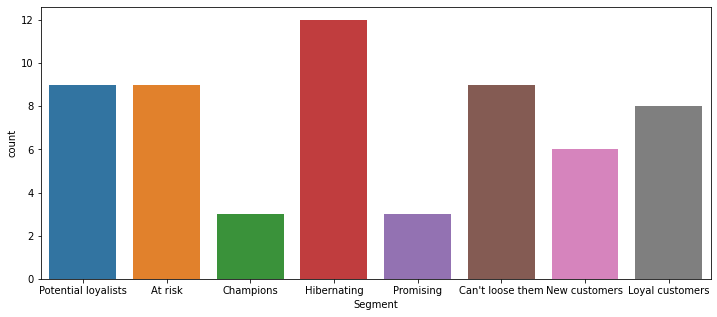

In [226]:
#plot 
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Segment", data=rfm)

#### conclusion: 

we could say that we have learned from this RFM analysis 

*  most of coustomer we have in this dataset are Low RFM customers (Hibernating),  These are the people who don’t spend much or buy often from your business. we may be want to offer free trial periods, one-off discounts, and other ways to get them to try out our services.
we will trying to encourage the people in this band to become medium RFM customers


* Our data contains a lot of odds  and irrigualr values, it needs more cleaning, we need to look at how the data is generated and improve data validation.
* Our data contain outliers and the outliers should be investigated and maybe labeled or removed.

After cleaning prepare the data our RFM model can be used for creating more precise action plans for each customer segments. This can have positive effects on marketing spend, conversion rates and customer retention.
